# Supply Chain Analysis Tutorial

This notebook demonstrates how to use the custom Python package `supply_chain_tool` to analyze supply chain performance. We will:

- Load and validate the data
- Explore revenue and profitability
- Visualize results
- Implement a reordering algorithm
- Used black for code formatting


In [2]:
from supply_chain_tool.loader import SupplyChainLoader
from supply_chain_tool.analyzer import SupplyChainAnalyzer

## Data Loading and Validation

We begin by loading the supply chain data set and applying basic validation to make sure that all cost values are non-negative and defect rates are within the 0–100% range.

In [3]:
loader = SupplyChainLoader()
df = loader.load_data("data/supply_chain_data.csv")
df_clean = loader.validate_data(df)
df_clean.head()

Load successful.


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## Revenue Analysis

We analyze total revenue generated across different product types
to identify which categories contribute the most to overall sales.


In [36]:
analyzer = SupplyChainAnalyzer()
revenue_by_type = analyzer.revenue_by_product_type(df_clean)
revenue_by_type

,Product type,Revenue generated
2,skincare,241628.162133
1,haircare,174455.390605
0,cosmetics,161521.265999


## Revenue Visualization

The following bar chart visualizes total revenue by product type.


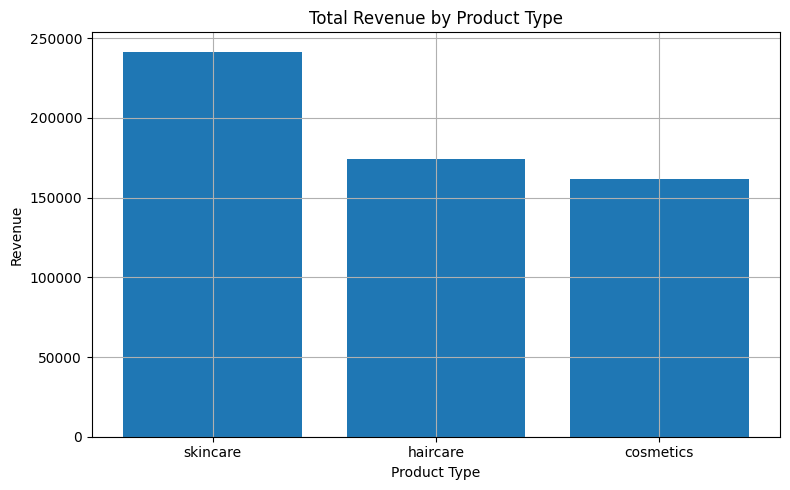

In [37]:
analyzer.plot_revenue_by_product_type(df_clean)

## Profitability Analysis

We now evaluate the actual profit for each product.
Profit is calculated as:

- Only non-defective units contribute to revenue
- All units (defective or not) still incur costs

We also compute:
- **Profit per unit sold**
- **Profit margin** (as a share of revenue)


In [38]:
ranked_profit = analyzer.ranked_profitability(df_clean)
ranked_profit.head(5)

,SKU,Product type,Profit,Profit Per Unit,Profit Margin
0,SKU11,skincare,86864.898679,90.484269,0.998543
1,SKU47,skincare,86184.969148,94.708757,0.993297
2,SKU52,skincare,78077.029654,95.215890,0.992337
3,SKU80,skincare,76411.661214,87.628052,0.989796
4,SKU40,skincare,71449.272447,76.580142,0.992639


In [39]:
ranked_profit.tail(5)

,SKU,Product type,Profit,Profit Per Unit,Profit Margin
95,SKU6,skincare,128.069209,1.970296,0.487997
96,SKU24,haircare,77.878427,0.372624,0.093089
97,SKU5,haircare,7.490131,0.050953,0.030830
98,SKU2,haircare,-55.510884,-6.938861,-0.642417
99,SKU97,haircare,-328.894619,-5.304752,-1.556987


## Reordering Algorithm

This algorithm generates a smart reorder plan for each SKU based on:

- Demand (units sold)
- Total lead time (sum of shipping, supplier, and manufacturing delays)
- Current stock levels and product availability

Products are ranked and categorized into tiers (low/medium/high),
and assigned suggested reorder quantities if needed.


In [41]:
reorder_plan = analyzer.generate_reorder_plan(df_clean)
reorder_plan

,SKU,Reorder,Suggested Quantity,Reason,Demand Rank,Lead Time Rank
0,SKU0,Yes,5228,High demand & high lead time,20,13
1,SKU1,Yes,6123,High demand & high lead time,24,1
2,SKU2,Yes,54,Low demand & medium lead time,100,46
3,SKU3,Yes,471,Low demand & high lead time,92,29
4,SKU4,No,0,High demand & low lead time,17,100
...,...,...,...,...,...,...
95,SKU95,Yes,3912,High demand & high lead time,28,22
96,SKU96,No,0,Medium demand & high lead time,60,22
97,SKU97,No,0,Low demand & medium lead time,95,65
98,SKU98,No,0,High demand & low lead time,11,75


## Summary

In this notebook, we demonstrated how to use the `supply_chain_tool` package to:

- Load and validate supply chain data
- Analyze and visualize revenue by product type
- Rank products by profitability, including per-unit profit and margins
- Generate smart reorder recommendations using custom business logic

This tool provides the basics for supply chain decisions and performance evaluation.
